<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import pymc3 as pm
import theano as T
import arviz as az

In [ ]:
boston_house = datasets.load_boston()
df_x = pd.DataFrame(data = boston_house.data, columns= boston_house.feature_names)
df_y = pd.DataFrame(data=boston_house.target)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3, random_state = 111)

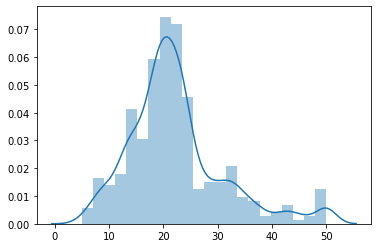

In [ ]:
sns.distplot(y_train)

In [ ]:
x_train = x_train.iloc[:,0:13]

In [ ]:
x_tr = T.shared(np.array(x_train))
y_tr = T.shared(np.array(y_train))

In [ ]:
with pm.Model() as LinearModel:
  #Priors
  W_0 = pm.Normal('Intercept', mu = 0, sigma=10, shape = (1))
  W = pm.Normal('weights', mu = 0, sigma=10, shape = (13,1))
  sigma = pm.HalfCauchy('sigma', 50)
  # Computing mean
  mu = pm.Deterministic('mu', W_0 + T.tensor.dot(x_tr, W))
  #Likelihood
  y_obs = pm.Normal('y_obs', mu = mu, sigma = sigma, observed = y_tr)
  trace = pm.sample(2000, tune = 1000)

<ipython-input-6-25ff2aaf17d2>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, tune = 1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Student\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Student\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, weights, Intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 7938 seconds.
There were 92 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8791692025091689, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\Student\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EE2D5AF70>,
      dtype=object)

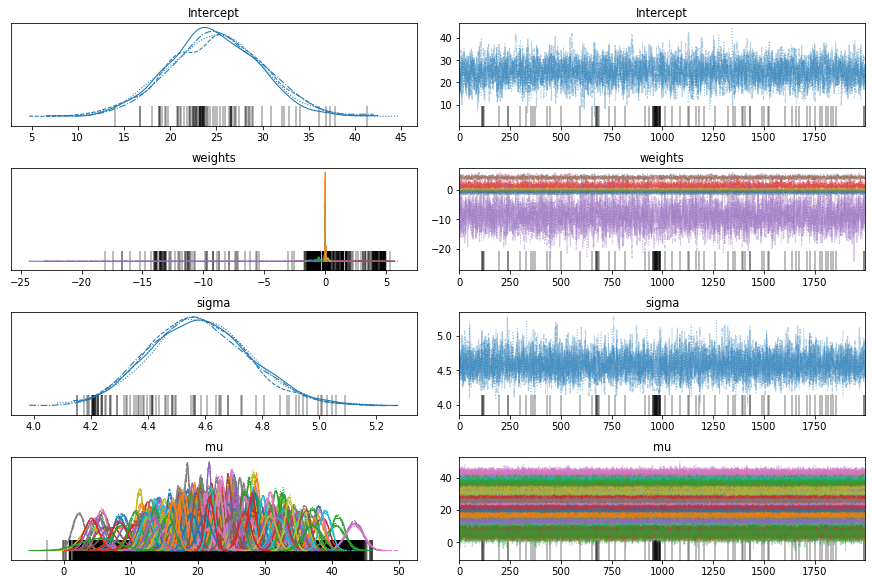

In [ ]:
az.plot_trace(trace)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

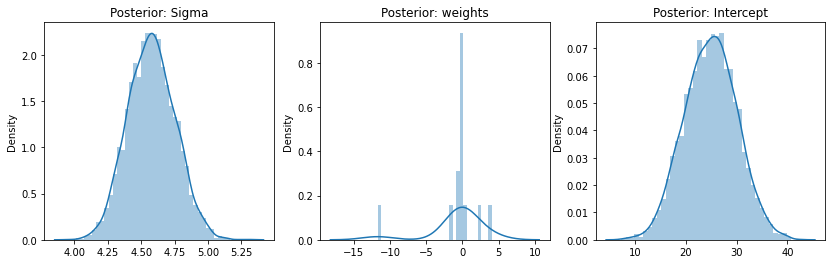

In [ ]:
_,axi = plt.subplots(1,3, figsize=(14,4))
sns.distplot(trace['sigma'], ax=axi[0]).set_title('Posterior: Sigma')
sns.distplot(trace['weights'][0], ax=axi[1]).set_title('Posterior: weights')
sns.distplot(trace['Intercept'], ax=axi[2]).set_title('Posterior: Intercept')
plt.show()

In [ ]:
#!pip install arviz
import arviz as az

In [ ]:
W0_hpd = az.hdi(trace['Intercept'])
sigma_hpd = az.hdi(trace['sigma'])
W_hpd = az.hdi(trace['weights'])

C:\Users\Student\anaconda3\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
C:\Users\Student\anaconda3\lib\site-packages\arviz\data\base.py:169: UserWarning: More chains (8000) than draws (13). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


In [ ]:
w0_m = trace['Intercept'].mean()
w_m = trace['weights'].mean(axis=0)

In [ ]:
x_tr.set_value(np.array(x_test))
y_tr.set_value(np.array(y_test))

ppc = pm.sample_posterior_predictive(trace, 1000, LinearModel)
y_pred = ppc['y_obs'].mean(axis=0)
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)


C:\Users\Student\anaconda3\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


0.7124081344876309

In [ ]:
y_pred.shape

(152, 1)

In [ ]:
!pip install pymc3>=3.8